<a href="https://colab.research.google.com/github/sa21262/datascience22/blob/main/Assignment21a/balanced_bank(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

import itertools
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, StratifiedKFold

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.cluster import KMeans


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import silhouette_score, f1_score , classification_report
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.utils.extmath import randomized_range_finder
from sklearn import metrics
from sklearn import datasets
import sklearn
from collections import Counter
from imblearn.datasets import make_imbalance
import pylab as pl

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/sa21262/datascience22/main/Assignment21a/balanced_bank.csv") # dataset is loaded here 
df

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,34579,35,admin.,single,university.degree,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,446,42,technician,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,20173,36,admin.,married,university.degree,no,no,no,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
3,18171,37,admin.,married,high.school,no,yes,yes,telephone,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
4,30128,31,management,single,university.degree,no,yes,no,cellular,apr,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,28870,45,blue-collar,married,unknown,no,yes,no,cellular,apr,...,1,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,yes
9276,30452,60,admin.,married,university.degree,no,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
9277,28937,38,blue-collar,married,basic.9y,no,yes,no,cellular,apr,...,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
9278,16739,41,technician,single,university.degree,no,no,no,cellular,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [ ]:
df.info() # information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9280 non-null   int64  
 1   age             9280 non-null   int64  
 2   job             9280 non-null   object 
 3   marital         9280 non-null   object 
 4   education       9280 non-null   object 
 5   default         9280 non-null   object 
 6   housing         9280 non-null   object 
 7   loan            9280 non-null   object 
 8   contact         9280 non-null   object 
 9   month           9280 non-null   object 
 10  day_of_week     9280 non-null   object 
 11  duration        9280 non-null   int64  
 12  campaign        9280 non-null   int64  
 13  pdays           9280 non-null   int64  
 14  previous        9280 non-null   int64  
 15  poutcome        9280 non-null   object 
 16  emp.var.rate    9280 non-null   float64
 17  cons.price.idx  9280 non-null   f

In [ ]:
print("Number of rows before dropping NaNs: %d" % len(df)) #dropping NaN values 
                                                        
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df)) #the results show that no NaN Values are found

Number of rows before dropping NaNs: 9280
Number of rows after dropping NaNs: 9280


In [ ]:
# LabelEncoder is applied here, so levels are numbered now 
label_enc = LabelEncoder()
df['y'] = label_enc.fit_transform(df['y']) # label Class is transformed into numbers 

df['y'].value_counts() #balanced dataset

0    4640
1    4640
Name: y, dtype: int64

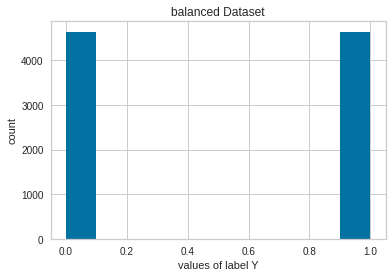

In [ ]:
histogram1=df['y'].hist() #balanced target variable

fig = histogram1.get_figure()

pl.title("balanced Dataset")
pl.xlabel("values of label Y")
pl.ylabel("count")

fig.savefig('balanced 2.pdf')

In [ ]:
df = pd.get_dummies(df) #onehot encoding is performed 
df

,Unnamed: 0,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,34579,35,143,1,999,1,-1.8,92.893,-46.2,1.266,...,0,0,0,0,1,0,0,1,0,0
1,446,42,1623,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,1,0
2,20173,36,610,2,999,0,1.4,93.444,-36.1,4.965,...,0,0,0,1,0,0,0,0,1,0
3,18171,37,1089,2,999,0,1.4,93.918,-42.7,4.963,...,0,0,0,0,0,0,1,0,1,0
4,30128,31,211,1,999,0,-1.8,93.075,-47.1,1.365,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,28870,45,944,1,999,1,-1.8,93.075,-47.1,1.410,...,0,0,0,0,1,0,0,1,0,0
9276,30452,60,1602,2,999,0,-1.8,92.893,-46.2,1.354,...,0,0,0,1,0,0,0,0,1,0
9277,28937,38,612,1,999,1,-1.8,93.075,-47.1,1.405,...,0,0,1,0,0,0,0,1,0,0
9278,16739,41,537,2,999,0,1.4,93.918,-42.7,4.962,...,0,0,0,0,1,0,0,0,1,0


In [ ]:

df.columns.str.match("Unnamed") # dropping a unnamed column because it represents the customer number and that is irrelevant for my data
df.loc[:,~df.columns.str.match("Unnamed")]


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,35,143,1,999,1,-1.8,92.893,-46.2,1.266,5099.1,...,0,0,0,0,1,0,0,1,0,0
1,42,1623,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,1,0,0,1,0
2,36,610,2,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,0,0,1,0,0,0,0,1,0
3,37,1089,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,0,0,0,0,0,0,1,0,1,0
4,31,211,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,45,944,1,999,1,-1.8,93.075,-47.1,1.410,5099.1,...,0,0,0,0,1,0,0,1,0,0
9276,60,1602,2,999,0,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,0,1,0
9277,38,612,1,999,1,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,1,0,0
9278,41,537,2,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,0,1,0,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab230f00d0>,
      dtype=object)

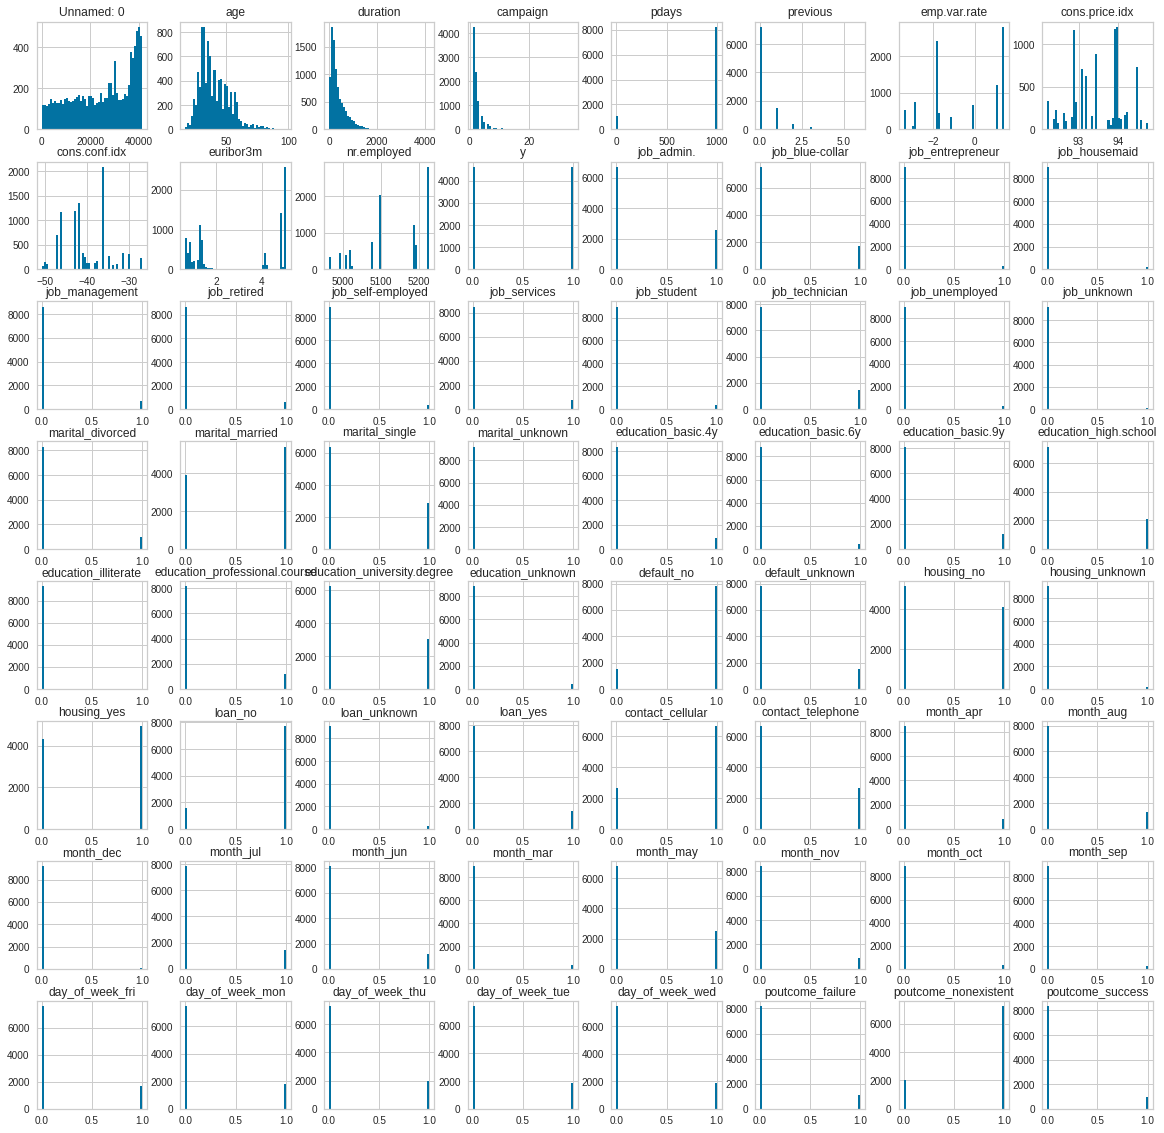

In [ ]:
df.hist(bins=50, figsize=(20,20)) # histogram of the features is displayed 

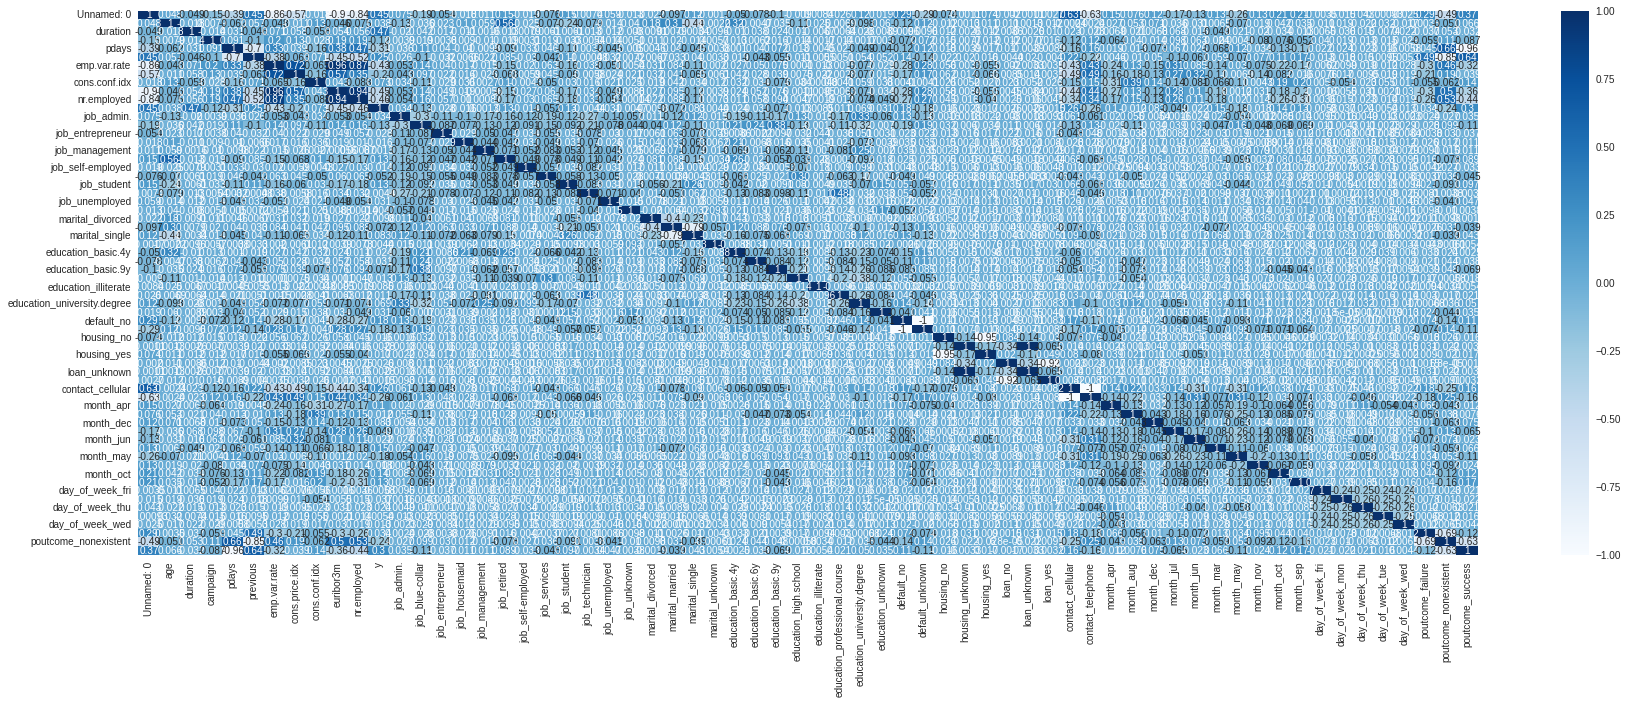

In [ ]:
correlations = df.corr()              #heatmap to show correlaton between features and label variable 
a1, b1 = plt.subplots(figsize=(30, 10))
b1 = sns.heatmap(correlations, annot=True, center=0,  cmap="Blues")

In [ ]:
y=df['y'].copy()
x=df.drop(['y'],axis=1)
print(f'Distribution before imbalancing: {Counter(y)}')

print ('65% Imbalance \n' ) # number of 1's are 65% of the total lenght of column class 
X1, y1 = make_imbalance(x, y,
                              sampling_strategy={0: 2499, 1: 4640},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y1)}')

print ('total number of rows now =', len(y1))

Distribution before imbalancing: Counter({0: 4640, 1: 4640})
65% Imbalance 

Distribution after imbalancing: Counter({1: 4640, 0: 2499})
total number of rows now = 7139


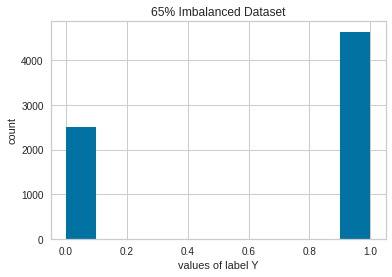

In [ ]:
histogram2=y1.hist() # 65% are 1's

fig = histogram2.get_figure()

pl.title("65% Imbalanced Dataset")
pl.xlabel("values of label Y")
pl.ylabel("count")

fig.savefig('Imbalanced2 65 perc.pdf')

In [ ]:
print(f'Distribution before imbalancing: {Counter(y)}')
print ('75% Imbalance \n' ) # number of 1's are 75% of the total lenght of column class 
X2, y2 = make_imbalance(x, y,
                              sampling_strategy={0: 1547, 1: 4640},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y2)}')

print ('total number of rows now =', len(y2))

Distribution before imbalancing: Counter({0: 4640, 1: 4640})
75% Imbalance 

Distribution after imbalancing: Counter({1: 4640, 0: 1547})
total number of rows now = 6187


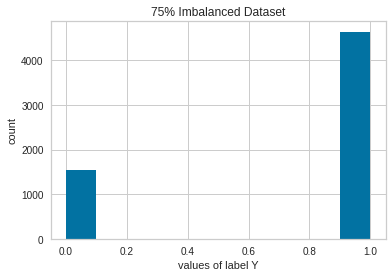

In [ ]:
histogram3=y2.hist() # 75% are 1's

fig = histogram3.get_figure()

pl.title("75% Imbalanced Dataset")
pl.xlabel("values of label Y")
pl.ylabel("count")

fig.savefig('Imbalanced2 75 perc.pdf')

In [ ]:
print(f'Distribution before imbalancing: {Counter(y)}')
print ('90% Imbalance \n' ) # number of 1's are 90% of the total lenght of column class 
X3, y3 = make_imbalance(x, y,
                              sampling_strategy={0: 516, 1: 4640},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y3)}')

print ('total number of rows now =', len(y3))

Distribution before imbalancing: Counter({0: 4640, 1: 4640})
90% Imbalance 

Distribution after imbalancing: Counter({1: 4640, 0: 516})
total number of rows now = 5156


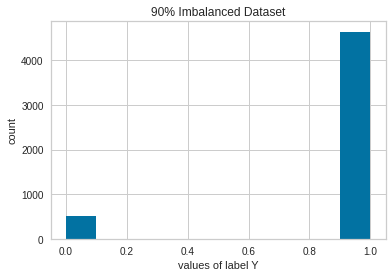

In [ ]:
histogram4=y3.hist() # 90% are 1's

fig = histogram4.get_figure()

pl.title("90% Imbalanced Dataset")
pl.xlabel("values of label Y")
pl.ylabel("count")

fig.savefig(' Imbalanced2 90 perc.pdf')

In [ ]:
def method1(d1 ,d2, label_variable):
  

  method1_clf=RandomForestClassifier()                                          # baseline classifier 
  metric=[]                                                                     # array to store measured metric 
  skf=StratifiedKFold(n_splits=10,random_state=None)                            # stratified cross validation is applied 
  skf.get_n_splits(d1,d2)

  for train_index,test_index in skf.split(d1,d2):

    
    x_train,x_test=d1.iloc[train_index],d1.iloc[test_index]                     # 4 surrogates of data are created training and test data 
    y_train,y_test=d2.iloc[train_index],d2.iloc[test_index]
    

    method1_clf.fit(x_train,y_train)                                            # model is fitted with training data 
    prediction=method1_clf.predict(x_test)                                      # model is tested on test data 
    score=f1_score(prediction,y_test)
    metric.append(score)                                                        # scores obtained for 10 iterations are stored in a array 
  
  metric=np.array([metric]) 
  print( "F1 Score for 10 iterations is given by :")                            # metric is converted to numpy array 
  print( metric)     


  print( "Mean F1 Score :")                                                     # All 10 scores for 1 iterations are displayed here 
  print(np.mean(metric))                                                        # mean of 10 scores is diplayed here

  print("\n")
  print( "standard Deviation of F1 Score :")
  print(np.std(metric))                                                        # standard deviation of 10 scores is diplayed here
  print("\n")

  result=pd.DataFrame(classification_report(y_test, prediction, output_dict=True))
  display(result)
  print(result.to_latex(index=True))


In [ ]:
method1(x,y,'y')                                                            # Method1 for original dataset 

F1 Score for 10 iterations is given by :
[[0.87900724 0.89876033 0.89634146 0.89326425 0.90794979 0.89049587
  0.91649269 0.88192268 0.89435897 0.90349947]]
Mean F1 Score :
0.8962092752417581


standard Deviation of F1 Score :
0.010740976955238525




,0,1,accuracy,macro avg,weighted avg
precision,0.915367,0.889353,0.90194,0.902360,0.902360
recall,0.885776,0.918103,0.90194,0.901940,0.901940
f1-score,0.900329,0.903499,0.90194,0.901914,0.901914
support,464.000000,464.000000,0.90194,928.000000,928.000000


\begin{tabular}{lrrrrr}
\toprule
{} &           0 &           1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &    0.915367 &    0.889353 &   0.90194 &    0.902360 &      0.902360 \\
recall    &    0.885776 &    0.918103 &   0.90194 &    0.901940 &      0.901940 \\
f1-score  &    0.900329 &    0.903499 &   0.90194 &    0.901914 &      0.901914 \\
support   &  464.000000 &  464.000000 &   0.90194 &  928.000000 &    928.000000 \\
\bottomrule
\end{tabular}



In [ ]:
method1(X1, y1,'y')                                                         # Method1 for 65% imbalanced dataset 

F1 Score for 10 iterations is given by :
[[0.92323439 0.93333333 0.92811839 0.92931393 0.94105481 0.9325026
  0.93181818 0.92819979 0.92744479 0.94747899]]
Mean F1 Score :
0.9322499211866384


standard Deviation of F1 Score :
0.00676266808632429




,0,1,accuracy,macro avg,weighted avg
precision,0.942222,0.924180,0.929874,0.933201,0.930481
recall,0.851406,0.971983,0.929874,0.911694,0.929874
f1-score,0.894515,0.947479,0.929874,0.920997,0.928982
support,249.000000,464.000000,0.929874,713.000000,713.000000


\begin{tabular}{lrrrrr}
\toprule
{} &           0 &           1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &    0.942222 &    0.924180 &  0.929874 &    0.933201 &      0.930481 \\
recall    &    0.851406 &    0.971983 &  0.929874 &    0.911694 &      0.929874 \\
f1-score  &    0.894515 &    0.947479 &  0.929874 &    0.920997 &      0.928982 \\
support   &  249.000000 &  464.000000 &  0.929874 &  713.000000 &    713.000000 \\
\bottomrule
\end{tabular}



In [ ]:
method1(X2, y2,'y')                                                         # Method1 for 75% imbalanced dataset 

F1 Score for 10 iterations is given by :
[[0.94780793 0.94264859 0.94915254 0.95706806 0.95742471 0.94979079
  0.94214876 0.95248152 0.94043887 0.95307612]]
Mean F1 Score :
0.9492037913445636


standard Deviation of F1 Score :
0.005718674019758476




,0,1,accuracy,macro avg,weighted avg
precision,0.943089,0.923232,0.927184,0.933161,0.928181
recall,0.753247,0.984914,0.927184,0.869080,0.927184
f1-score,0.837545,0.953076,0.927184,0.895311,0.924287
support,154.000000,464.000000,0.927184,618.000000,618.000000


\begin{tabular}{lrrrrr}
\toprule
{} &           0 &           1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &    0.943089 &    0.923232 &  0.927184 &    0.933161 &      0.928181 \\
recall    &    0.753247 &    0.984914 &  0.927184 &    0.869080 &      0.927184 \\
f1-score  &    0.837545 &    0.953076 &  0.927184 &    0.895311 &      0.924287 \\
support   &  154.000000 &  464.000000 &  0.927184 &  618.000000 &    618.000000 \\
\bottomrule
\end{tabular}



In [ ]:
method1(X3, y3,'y')                                                         # Method1 for 90% imbalanced dataset 

F1 Score for 10 iterations is given by :
[[0.97371188 0.96740273 0.97674419 0.97263158 0.97993664 0.97354497
  0.97881356 0.97659574 0.97659574 0.97777778]]
Mean F1 Score :
0.9753754823221303


standard Deviation of F1 Score :
0.0034707211767125252




,0,1,accuracy,macro avg,weighted avg
precision,0.941176,0.960499,0.959223,0.950838,0.958585
recall,0.627451,0.995690,0.959223,0.811570,0.959223
f1-score,0.752941,0.977778,0.959223,0.865359,0.955512
support,51.000000,464.000000,0.959223,515.000000,515.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0 &           1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &   0.941176 &    0.960499 &  0.959223 &    0.950838 &      0.958585 \\
recall    &   0.627451 &    0.995690 &  0.959223 &    0.811570 &      0.959223 \\
f1-score  &   0.752941 &    0.977778 &  0.959223 &    0.865359 &      0.955512 \\
support   &  51.000000 &  464.000000 &  0.959223 &  515.000000 &    515.000000 \\
\bottomrule
\end{tabular}



In [ ]:
def elbowgraph(x):  # Elbow and Sillhouette Method is implemented here 
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(2,12), scoring='silhouette', timings=True)

  visualizer.fit(x)        # Fit the data to the visualizer
  visualizer.show()
  viz = SilhouetteVisualizer(model, colors='yellowbrick')
  viz.fit(x)        # Fit the data to the visualizer
  viz.show()        # Finalize and render the figure

  return visualizer.elbow_value_

In [ ]:
def Elbowandsilhoutte(d1 ,d2, label_variable):                                  # Function for method 2 is created here 
  skf=StratifiedKFold(n_splits=10,random_state=None)                            # stratified cross validation is applied 
  skf.get_n_splits(d1,d2)

  for train_index,test_index in skf.split(d1,d2):

    
    x1_train,x1_test=d1.iloc[train_index],d1.iloc[test_index]                   # 4 surrogates of data are created training and test data 
    y1_train,y1_test=d2.iloc[train_index],d2.iloc[test_index]


    scaler = StandardScaler()
    x1_train = scaler.fit_transform(x1_train)
   
    x1_test = scaler.transform(x1_test)
  
    
  k2=elbowgraph(x1_train)                                                       # function for Elbow and silhouette method is called here 
  print("The optimum value of k is ",k2)
  
  




  kmeans = KMeans(n_clusters=k2)                                                # finally K means is applied with optimum value of k 
  kmeans.fit(x1_train)                                                          # assigning each row of training data with particular cluster number
  
  labels = kmeans.predict(x1_test)                                              # getting prediction of Kmeans on test data to assign each instant of test data with cluster label  

  centroids  = kmeans.cluster_centers_                                          # evaluating centroids of clusters 
  cluster=kmeans.labels_

  new_x1_train=pd.DataFrame(x1_train)                                           # converting x1_train (training data ) to dataframe 
  new_x1_train['Cluster_number'] = cluster                                      # adding cluster number column with training dataframe 
  new_x1_train['label_variable']=  y1_train                                     # adding label variable column in  training dataframe  
  new_x1_train.dropna(axis=0,inplace=True)
  


  


  for i in range (len(centroids)) :
     print("Centroid of cluster " + str(i)+ " = " +str(centroids[i,:].mean()))  # displaying centroid of each cluster 
      
     cls= new_x1_train['label_variable'].loc[(new_x1_train['Cluster_number'] == i) ] # displaying number of instances of label variable in each cluster 
     print(cls.value_counts())
     print("\n\n")

  model1=RandomForestClassifier()
  answer= np.zeros(len(y1_test))
  f1score=[]
  for c in range (len(centroids)):
     cls1= new_x1_train.loc[(new_x1_train['Cluster_number'] == c) ]
     cls1.dropna(subset=['label_variable'],inplace=True)


     
     

     if cls1['label_variable'].nunique() > 1:                                   # checking if the cluster possess instants of more than one class 
        a1=cls1['label_variable']
        a2=cls1.drop(['label_variable', 'Cluster_number'], axis=1)
        model1.fit(a2,a1)                                                       # model is fitted with training data 

        




        for k in range (len(labels)):
          if labels[k]==c:                                                      #getting prediction on test data 
            answer[k]=model1.predict(np.reshape(x1_test[k],(1,-1)))
     
     f1score.append(f1_score(y1_test,answer))
  for f in range(len(f1score)):
    print("F1 Score on cluster "+ str(f)+ " is given by :"+str(f1score[f]))   
  

  f1score=np.array([f1score])

  print("\n")

  print( "Mean F1 Score :")                                                     
  print(np.mean(f1score))                                                       # mean of scores is diplayed here 
  print("\n")


  print( "standard Deviation of F1 Score :")
  print(np.std(f1score))                                                        # standard deviation of  scores is diplayed here
  print("\n")
                                                         
  result=pd.DataFrame(classification_report(y1_test, answer, output_dict=True)) #classification report is printed here
  display(result)     
  print(result.to_latex(index=True))

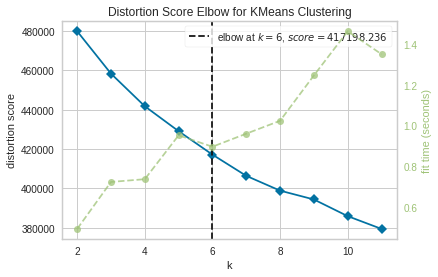

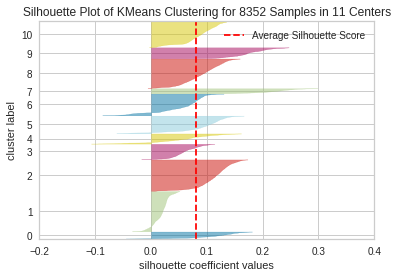

The optimum value of k is  6
Centroid of cluster 0 = 0.031202622060440565
0.0    1464
1.0     462
Name: label_variable, dtype: int64



Centroid of cluster 1 = -0.04434761654886291
1.0    1852
0.0    1068
Name: label_variable, dtype: int64



Centroid of cluster 2 = -0.025121184993707708
1.0    800
0.0     61
Name: label_variable, dtype: int64



Centroid of cluster 3 = -0.01753947277804572
1.0    244
0.0     31
Name: label_variable, dtype: int64



Centroid of cluster 4 = 0.032567880478609514
0.0    1454
1.0     709
Name: label_variable, dtype: int64



Centroid of cluster 5 = 0.12995260556058758
0.0    98
1.0    97
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.13438735177865613
F1 Score on cluster 1 is given by :0.6229508196721312
F1 Score on cluster 2 is given by :0.7484662576687117
F1 Score on cluster 3 is given by :0.7862232779097388
F1 Score on cluster 4 is given by :0.8869752421959096
F1 Score on cluster 5 is given by :0.8943436499466382


Mean F1 Score :
0.6788910998619643


standard Deviation of F1 Score :
0.2600299204840484




,0,1,accuracy,macro avg,weighted avg
precision,0.901099,0.885835,0.893319,0.893467,0.893467
recall,0.883621,0.903017,0.893319,0.893319,0.893319
f1-score,0.892274,0.894344,0.893319,0.893309,0.893309
support,464.000000,464.000000,0.893319,928.000000,928.000000


\begin{tabular}{lrrrrr}
\toprule
{} &           0 &           1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &    0.901099 &    0.885835 &  0.893319 &    0.893467 &      0.893467 \\
recall    &    0.883621 &    0.903017 &  0.893319 &    0.893319 &      0.893319 \\
f1-score  &    0.892274 &    0.894344 &  0.893319 &    0.893309 &      0.893309 \\
support   &  464.000000 &  464.000000 &  0.893319 &  928.000000 &    928.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(x,y,'y')             # Method 2 on Original dataset 

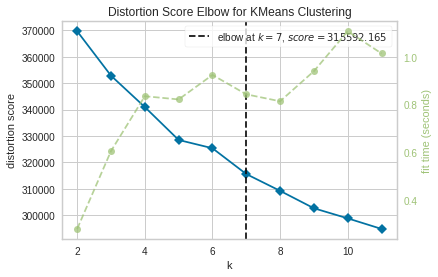

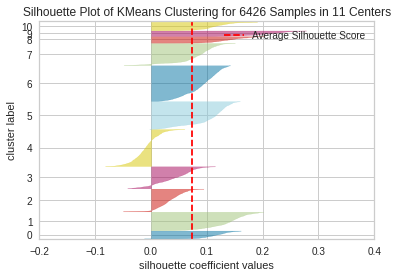

The optimum value of k is  7
Centroid of cluster 0 = 0.12048531651898536
1.0    99
0.0    59
Name: label_variable, dtype: int64



Centroid of cluster 1 = 0.03938506318536878
0.0    736
1.0    642
Name: label_variable, dtype: int64



Centroid of cluster 2 = -0.008002717312909177
1.0    471
0.0    223
Name: label_variable, dtype: int64



Centroid of cluster 3 = -0.0503168845131176
1.0    1420
0.0     389
Name: label_variable, dtype: int64



Centroid of cluster 4 = -0.03244036387600275
1.0    640
0.0     33
Name: label_variable, dtype: int64



Centroid of cluster 5 = 0.03720496715793665
0.0    791
1.0    448
Name: label_variable, dtype: int64



Centroid of cluster 6 = 0.007707314863812649
1.0    207
0.0     19
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.017094017094017096
F1 Score on cluster 1 is given by :0.29143897996357016
F1 Score on cluster 2 is given by :0.4172185430463577
F1 Score on cluster 3 is given by :0.7649999999999999
F1 Score on cluster 4 is given by :0.8633754305396096
F1 Score on cluster 5 is given by :0.9096844396082698
F1 Score on cluster 6 is given by :0.9409282700421941


Mean F1 Score :
0.6006770971848597


standard Deviation of F1 Score :
0.3331930574299874




,0,1,accuracy,macro avg,weighted avg
precision,0.921397,0.921488,0.921459,0.921442,0.921456
recall,0.847390,0.961207,0.921459,0.904298,0.921459
f1-score,0.882845,0.940928,0.921459,0.911887,0.920644
support,249.000000,464.000000,0.921459,713.000000,713.000000


\begin{tabular}{lrrrrr}
\toprule
{} &           0 &           1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &    0.921397 &    0.921488 &  0.921459 &    0.921442 &      0.921456 \\
recall    &    0.847390 &    0.961207 &  0.921459 &    0.904298 &      0.921459 \\
f1-score  &    0.882845 &    0.940928 &  0.921459 &    0.911887 &      0.920644 \\
support   &  249.000000 &  464.000000 &  0.921459 &  713.000000 &    713.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(X1,y1,'y')           # Method 2 on 65% imbalanced version of dataset 

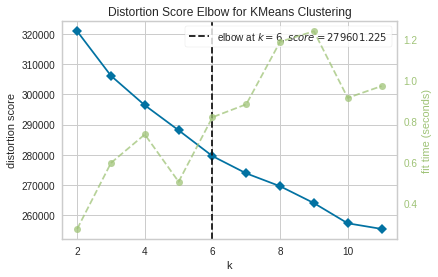

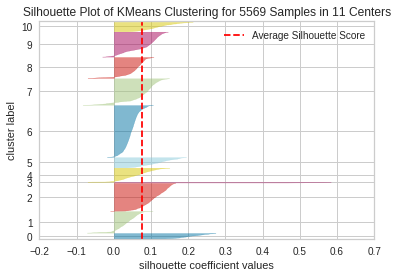

The optimum value of k is  6
Centroid of cluster 0 = -0.053882390818129504
1.0    1359
0.0     231
Name: label_variable, dtype: int64



Centroid of cluster 1 = 0.032173071200287395
1.0    368
0.0     18
Name: label_variable, dtype: int64



Centroid of cluster 2 = 0.044240258190177524
1.0    655
0.0    468
Name: label_variable, dtype: int64



Centroid of cluster 3 = -0.026692566339498063
1.0    1071
0.0     163
Name: label_variable, dtype: int64



Centroid of cluster 4 = 0.04312895854842438
0.0    474
1.0    466
Name: label_variable, dtype: int64



Centroid of cluster 5 = 0.11914437389534295
1.0    103
0.0     39
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.5224111282843894
F1 Score on cluster 1 is given by :0.6005830903790087
F1 Score on cluster 2 is given by :0.734375
F1 Score on cluster 3 is given by :0.9032258064516129
F1 Score on cluster 4 is given by :0.9495798319327732
F1 Score on cluster 5 is given by :0.9509906152241918


Mean F1 Score :
0.7768609120453293


standard Deviation of F1 Score :
0.17016887736612848




,0,1,accuracy,macro avg,weighted avg
precision,0.934959,0.921212,0.923948,0.928086,0.924638
recall,0.746753,0.982759,0.923948,0.864756,0.923948
f1-score,0.830325,0.950991,0.923948,0.890658,0.920922
support,154.000000,464.000000,0.923948,618.000000,618.000000


\begin{tabular}{lrrrrr}
\toprule
{} &           0 &           1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &    0.934959 &    0.921212 &  0.923948 &    0.928086 &      0.924638 \\
recall    &    0.746753 &    0.982759 &  0.923948 &    0.864756 &      0.923948 \\
f1-score  &    0.830325 &    0.950991 &  0.923948 &    0.890658 &      0.920922 \\
support   &  154.000000 &  464.000000 &  0.923948 &  618.000000 &    618.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(X2,y2,'y') # Method 2 on 75% imbalanced version of dataset 

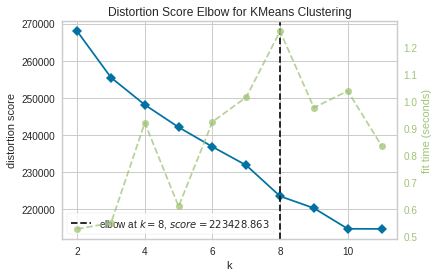

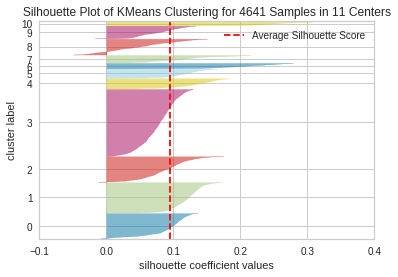

The optimum value of k is  8
Centroid of cluster 0 = -0.029795334492194
1.0    775
0.0     10
Name: label_variable, dtype: int64



Centroid of cluster 1 = -0.033789607468620975
1.0    291
0.0     23
Name: label_variable, dtype: int64



Centroid of cluster 2 = -0.04216653071805708
1.0    1282
0.0      52
Name: label_variable, dtype: int64



Centroid of cluster 3 = 0.04870649539697471
1.0    323
0.0     94
Name: label_variable, dtype: int64



Centroid of cluster 4 = 0.11769087642166763
1.0    103
0.0     17
Name: label_variable, dtype: int64



Centroid of cluster 5 = 0.0015058172852972947
1.0    480
0.0     42
Name: label_variable, dtype: int64



Centroid of cluster 6 = 0.05339427907344813
1.0    516
0.0    123
Name: label_variable, dtype: int64



Centroid of cluster 7 = 0.0467815868715575
1.0    355
0.0    104
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.3090909090909091
F1 Score on cluster 1 is given by :0.40955631399317405
F1 Score on cluster 2 is given by :0.7412398921832885
F1 Score on cluster 3 is given by :0.8095838587641866
F1 Score on cluster 4 is given by :0.8155583437892095
F1 Score on cluster 5 is given by :0.8789659224441834
F1 Score on cluster 6 is given by :0.9419496166484118
F1 Score on cluster 7 is given by :0.9767932489451476


Mean F1 Score :
0.7353422632323139


standard Deviation of F1 Score :
0.22951602618771832




,0,1,accuracy,macro avg,weighted avg
precision,0.967742,0.956612,0.957282,0.962177,0.957714
recall,0.588235,0.997845,0.957282,0.793040,0.957282
f1-score,0.731707,0.976793,0.957282,0.854250,0.952523
support,51.000000,464.000000,0.957282,515.000000,515.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0 &           1 &  accuracy &   macro avg &  weighted avg \\
\midrule
precision &   0.967742 &    0.956612 &  0.957282 &    0.962177 &      0.957714 \\
recall    &   0.588235 &    0.997845 &  0.957282 &    0.793040 &      0.957282 \\
f1-score  &   0.731707 &    0.976793 &  0.957282 &    0.854250 &      0.952523 \\
support   &  51.000000 &  464.000000 &  0.957282 &  515.000000 &    515.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(X3,y3,'y') # Method 2 on 90% imbalanced version of dataset 